In [2]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [4]:
df = pd.read_csv('ALLerrordataset.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [4]:
df.shape

(286978, 30)

In [5]:
df.describe()

,statuscode,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,uamajor,uafamily,devicefamily,...,coordinates,livechannel,devicemodel,devicebrand,host,assetnumber,@version,cachename,popname,uid
count,286978.000000,286978.000000,283665.000000,286978.000000,1.355400e+04,107497.000000,2.752970e+05,38978.000000,107497.000000,107497.000000,...,283337.000000,35765.000000,41141.000000,41141.000000,280956.000000,23.000000,286978.0,286978.000000,286978.0,18356.000000
mean,409.910045,4.254096,0.141215,0.146451,8.471651e+04,0.701861,6.435878e+05,17.950434,9.371713,8.136739,...,303.111567,49.588117,20.064656,1.722102,25.994608,1027.086957,1.0,1.034309,0.0,7668.889791
std,24.634864,12.624948,1.073886,1.218501,1.600366e+06,1.150625,3.776974e+05,23.770871,9.630571,43.745622,...,1229.703327,38.428935,66.295450,4.368852,21.188978,892.364475,0.0,0.822115,0.0,6086.370769
min,400.000000,0.000000,0.000015,0.000000,6.000000e+01,0.000000,1.800000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,1.0,0.000000,0.0,0.000000
25%,403.000000,2.619048,0.000052,0.000126,3.600000e+03,0.000000,2.793420e+05,1.000000,1.000000,0.000000,...,0.000000,14.000000,0.000000,0.000000,7.000000,258.000000,1.0,0.000000,0.0,1618.000000
50%,403.000000,2.619048,0.000062,0.000149,3.600000e+03,0.000000,6.567990e+05,14.000000,12.000000,0.000000,...,0.000000,60.000000,0.000000,0.000000,14.000000,1080.000000,1.0,1.000000,0.0,7255.000000
75%,404.000000,2.619048,0.015159,0.015171,3.600000e+03,1.000000,9.902070e+05,19.000000,12.000000,1.000000,...,1.000000,60.000000,0.000000,0.000000,47.000000,1665.000000,1.0,2.000000,0.0,11357.000000
max,503.000000,164.301587,60.072557,60.072603,3.153600e+07,17.000000,1.281547e+06,141.000000,99.000000,1506.000000,...,19526.000000,319.000000,1452.000000,24.000000,59.000000,2530.000000,1.0,2.000000,0.0,26804.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286978 entries, 0 to 286977
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   statuscode      286978 non-null  int64  
 1   contenttype     272906 non-null  object 
 2   protocol        286978 non-null  object 
 3   contentlength   286978 non-null  float64
 4   timefirstbyte   283665 non-null  float64
 5   timetoserv      286978 non-null  float64
 6   maxage          13554 non-null   float64
 7   osfamily        107497 non-null  float64
 8   sid             275297 non-null  float64
 9   cachecontrol    286978 non-null  object 
 10  uamajor         38978 non-null   float64
 11  uafamily        107497 non-null  float64
 12  devicefamily    107497 non-null  float64
 13  fragment        286978 non-null  bool   
 14  path            286978 non-null  int64  
 15  @timestamp      286978 non-null  object 
 16  contentpackage  23 non-null      float64
 17  coordinate

In [7]:
df.nunique()

statuscode            11
contenttype            8
protocol               2
contentlength         31
timefirstbyte      39360
timetoserv         38993
maxage                 6
osfamily              12
sid               238717
cachecontrol           8
uamajor               83
uafamily              44
devicefamily         148
fragment               1
path               18516
@timestamp         76905
contentpackage        11
coordinates         2543
livechannel          155
devicemodel          148
devicebrand           17
host                  57
method                20
manifest               1
assetnumber           11
hit                    1
@version               1
cachename              3
popname                1
uid                 1273
dtype: int64

In [7]:
df=df.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)

In [8]:
df=df.drop(labels=["timefirstbyte","contentlength","timetoserv","maxage","sid"],axis=1)

In [9]:
df=df.drop(labels=["path","@timestamp","uid"],axis=1)

In [11]:
df.nunique()

statuscode          11
contenttype          8
protocol             2
osfamily            12
cachecontrol         8
uamajor             83
uafamily            44
devicefamily       148
contentpackage      11
coordinates       2543
livechannel        155
devicemodel        148
devicebrand         17
host                57
method              20
assetnumber         11
cachename            3
dtype: int64

In [12]:
df.host.value_counts().sort_values()

43.0        1
59.0        1
51.0        1
35.0        1
15.0        1
42.0        1
58.0        1
48.0        2
37.0        2
52.0        2
39.0        3
21.0        3
40.0        3
44.0        3
38.0        5
8.0         6
41.0        6
17.0        6
24.0        7
18.0        8
56.0        9
45.0        9
49.0        9
25.0       11
36.0       14
34.0       15
50.0       15
30.0       17
33.0       18
57.0       18
9.0        19
4.0        21
26.0       23
32.0       25
10.0       25
29.0       26
28.0       26
31.0       26
23.0       27
20.0       29
5.0        43
12.0       45
22.0       50
27.0       52
11.0       55
16.0      345
46.0      350
54.0      380
3.0      1660
0.0      8927
13.0    11658
2.0     18313
1.0     19551
7.0     43670
47.0    56497
14.0    57224
53.0    61691
Name: host, dtype: int64

<AxesSubplot:>

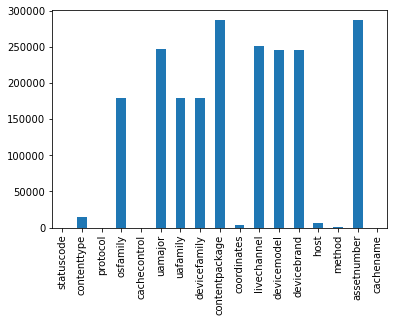

In [13]:
df.isnull().sum().plot.bar(x="Features", y="Missing Values")

In [14]:
df_livetv = df[df['host'] == 7]

In [15]:
df_livetv.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
70,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,2031.0,NaN,NaN,NaN,7.0,GET,NaN,0
73,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,58.0,NaN,NaN,NaN,7.0,GET,NaN,0
74,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,649.0,NaN,NaN,NaN,7.0,GET,NaN,0
75,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,0.0,NaN,NaN,NaN,7.0,GET,NaN,0
79,412,text/html,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,4121.0,60.0,NaN,NaN,7.0,GET,NaN,0


In [65]:
df_livetv.cachecontrol.value_counts().sort_values()

Cache-Control:Cache-Control: max-age=60      240
Cache-Control:                             43430
Name: cachecontrol, dtype: int64

In [16]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      43670 non-null  int64  
 1   contenttype     42588 non-null  object 
 2   protocol        43670 non-null  object 
 3   osfamily        38898 non-null  float64
 4   cachecontrol    43670 non-null  object 
 5   uamajor         4 non-null      float64
 6   uafamily        38898 non-null  float64
 7   devicefamily    38898 non-null  float64
 8   contentpackage  0 non-null      float64
 9   coordinates     43670 non-null  float64
 10  livechannel     16238 non-null  float64
 11  devicemodel     0 non-null      float64
 12  devicebrand     0 non-null      float64
 13  host            43670 non-null  float64
 14  method          43670 non-null  object 
 15  assetnumber     0 non-null      float64
 16  cachename       43670 non-null  int64  
dtypes: float64(11), int64(2), obj

In [17]:
df_livetv=df_livetv.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)

In [18]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    43670 non-null  int64  
 1   contenttype   42588 non-null  object 
 2   protocol      43670 non-null  object 
 3   osfamily      38898 non-null  float64
 4   cachecontrol  43670 non-null  object 
 5   uamajor       4 non-null      float64
 6   uafamily      38898 non-null  float64
 7   devicefamily  38898 non-null  float64
 8   coordinates   43670 non-null  float64
 9   livechannel   16238 non-null  float64
 10  host          43670 non-null  float64
 11  method        43670 non-null  object 
 12  cachename     43670 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 4.7+ MB


In [19]:
df_livetv.nunique()

statuscode         5
contenttype        2
protocol           1
osfamily           2
cachecontrol       2
uamajor            2
uafamily           4
devicefamily       1
coordinates     1524
livechannel        7
host               1
method             1
cachename          3
dtype: int64

In [66]:
df_livetv=df_livetv.drop(labels=["cachecontrol"],axis=1)

In [67]:
df_livetv.nunique()

statuscode        5
contenttype       3
osfamily          3
uafamily          5
coordinates    1524
livechannel       8
cachename         3
dtype: int64

In [22]:
df_livetv=df_livetv.drop(labels=["uamajor"],axis=1)

In [68]:
df_livetv.isnull().sum()

statuscode     0
contenttype    0
osfamily       0
uafamily       0
coordinates    0
livechannel    0
cachename      0
dtype: int64

In [24]:
df_livetv.fillna("-1", inplace = True)

In [69]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  43670 non-null  object 
 2   osfamily     43670 non-null  object 
 3   uafamily     43670 non-null  object 
 4   coordinates  43670 non-null  float64
 5   livechannel  43670 non-null  object 
 6   cachename    43670 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.7+ MB


In [26]:
df_livetv['coordinates'] = df_livetv['coordinates'].astype(object)

In [26]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    43670 non-null  int64  
 1   contenttype   43670 non-null  object 
 2   osfamily      43670 non-null  object 
 3   cachecontrol  43670 non-null  object 
 4   uafamily      43670 non-null  object 
 5   coordinates   43670 non-null  float64
 6   livechannel   43670 non-null  object 
 7   cachename     43670 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.0+ MB


In [70]:
df_livetv_1 = df_livetv.copy()

In [71]:
categorical_cols = df_livetv_1.select_dtypes(include= "object").columns
categorical_cols

Index(['contenttype', 'osfamily', 'uafamily', 'livechannel'], dtype='object')

In [72]:
df_livetv_1[categorical_cols] = df_livetv_1[categorical_cols].apply(lambda x:x.astype("category"))

In [73]:
df_livetv_1[categorical_cols]=df_livetv_1[categorical_cols].apply(lambda x: x.cat.codes)

In [74]:
df_livetv_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  43670 non-null  int8   
 2   osfamily     43670 non-null  int8   
 3   uafamily     43670 non-null  int8   
 4   coordinates  43670 non-null  float64
 5   livechannel  43670 non-null  int8   
 6   cachename    43670 non-null  int64  
dtypes: float64(1), int64(2), int8(4)
memory usage: 1.5 MB


In [75]:
df_livetv_1.head()

,statuscode,contenttype,osfamily,uafamily,coordinates,livechannel,cachename
70,400,2,0,2,2031.0,7,0
73,400,2,0,2,58.0,7,0
74,400,2,0,2,649.0,7,0
75,400,2,0,2,0.0,7,0
79,412,1,0,2,4121.0,3,0


In [76]:
X = df_livetv_1.loc[:, df_livetv_1.columns != "statuscode"]
y = df_livetv_1["statuscode"]

In [77]:
X.head()

,contenttype,osfamily,uafamily,coordinates,livechannel,cachename
70,2,0,2,2031.0,7,0
73,2,0,2,58.0,7,0
74,2,0,2,649.0,7,0
75,2,0,2,0.0,7,0
79,1,0,2,4121.0,3,0


In [78]:
# Lets use the sklearn chi2 fnction
cs = SelectKBest(score_func=chi2,k=5)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=5,columns="Score")

,Score,P_Value
coordinates,2.748982e+06,0.0
livechannel,2.903886e+04,0.0
osfamily,1.805167e+04,0.0
contenttype,7.825449e+03,0.0
uafamily,1.785399e+03,0.0


In [26]:
import sklearn
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [80]:
x_train.shape

(34936, 6)

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
etc = ExtraTreesClassifier(criterion='entropy')

In [83]:
etc.fit(x_train, y_train)

ExtraTreesClassifier(criterion='entropy')

In [84]:
pred_etc = etc.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix
tab_etc = confusion_matrix(pred_etc, y_test)

In [86]:
tab_etc

array([[5530,    0,    0,    0,    0],
       [   0,    3,    0,    0,    0],
       [   0,    0,  194,    0,    0],
       [   0,    0,    0, 2964,    0],
       [   0,    0,    0,    0,   43]], dtype=int64)

In [87]:
etc.feature_importances_

array([0.41793196, 0.05784697, 0.02713459, 0.00988238, 0.48021793,
       0.00698617])

In [88]:
feature_importance = pd.DataFrame({"Features" : x_train.columns, "Score" :etc.feature_importances_})
feature_importance.head(5)

,Features,Score
0,contenttype,0.417932
1,osfamily,0.057847
2,uafamily,0.027135
3,coordinates,0.009882
4,livechannel,0.480218


In [89]:
feature_importance =  feature_importance.sort_values('Score', ascending=False)
feature_importance.head(5)

,Features,Score
4,livechannel,0.480218
0,contenttype,0.417932
1,osfamily,0.057847
2,uafamily,0.027135
3,coordinates,0.009882


In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [91]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

KNeighborsClassifier()

In [92]:
sfs1 = SFS(model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=0)


sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   14.8s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.0s finished

[2022-03-03 16:18:19] Features: 1/5 -- score: 0.9995420196931531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s finished

[2022-03-03 16:18:33] Features: 2/5 -- score: 0.9997423860773986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.7s finished

[2022-03-03 16:18:46] Features: 3/5 -- score: 0.9997996336157545[Parallel(n_jobs=-1)]: Using backend Lok

In [93]:
sfs1.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([0.99954202]),
  'avg_score': 0.9995420196931531,
  'feature_names': ('livechannel',)},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([0.99974239]),
  'avg_score': 0.9997423860773986,
  'feature_names': ('osfamily', 'livechannel')},
 3: {'feature_idx': (0, 1, 4),
  'cv_scores': array([0.99979963]),
  'avg_score': 0.9997996336157545,
  'feature_names': ('contenttype', 'osfamily', 'livechannel')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.99979963]),
  'avg_score': 0.9997996336157545,
  'feature_names': ('contenttype', 'osfamily', 'uafamily', 'livechannel')},
 5: {'feature_idx': (0, 1, 2, 4, 5),
  'cv_scores': array([0.99979963]),
  'avg_score': 0.9997996336157545,
  'feature_names': ('contenttype',
   'osfamily',
   'uafamily',
   'livechannel',
   'cachename')}}

In [94]:
sfs1.get_metric_dict()

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (4,),
  'cv_scores': array([0.99954202]),
  'avg_score': 0.9995420196931531,
  'feature_names': ('livechannel',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([0.99974239]),
  'avg_score': 0.9997423860773986,
  'feature_names': ('osfamily', 'livechannel'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 1, 4),
  'cv_scores': array([0.99979963]),
  'avg_score': 0.9997996336157545,
  'feature_names': ('contenttype', 'osfamily', 'livechannel'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.99979963]),
  'avg_score': 0.9997996336157545,
  'feature_names': ('contenttype', 'osfamily', 'uafamily', 'livechannel'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 2, 4, 5),
  'cv_scores': array([0.99979963]),
  'avg_score': 0.9997996336157545,
  'feature_names': ('contenttype',
   'osf

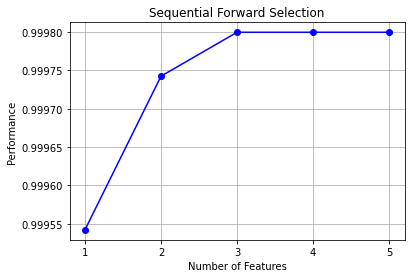

In [95]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [96]:
sfs1.k_feature_idx_

(0, 1, 2, 4, 5)

In [97]:
df_livetv_1.columns[1:][list(sfs1.k_feature_idx_)]

Index(['contenttype', 'osfamily', 'uafamily', 'livechannel', 'cachename'], dtype='object')

In [98]:
x_train.corr()

,contenttype,osfamily,uafamily,coordinates,livechannel,cachename
contenttype,1.000000,-0.400152,-0.400209,-0.023203,0.942861,-0.114008
osfamily,-0.400152,1.000000,0.997951,0.017630,-0.458398,-0.071437
uafamily,-0.400209,0.997951,1.000000,0.010886,-0.458367,-0.071227
coordinates,-0.023203,0.017630,0.010886,1.000000,0.014416,0.014838
livechannel,0.942861,-0.458398,-0.458367,0.014416,1.000000,-0.123709
cachename,-0.114008,-0.071437,-0.071227,0.014838,-0.123709,1.000000


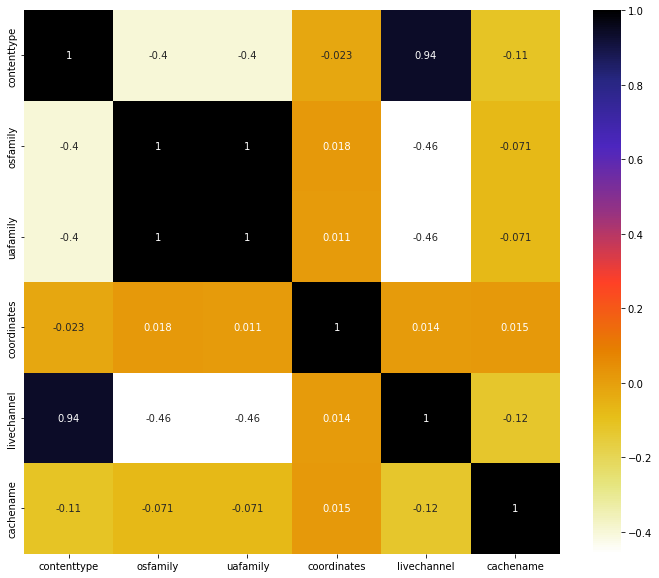

In [99]:
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [100]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [101]:
corr_features = correlation(x_train, 0.85)
len(set(corr_features))

2

In [102]:
corr_features

{'livechannel', 'uafamily'}

In [103]:
corr_features1 = correlation(x_train, 0.70)
len(set(corr_features1))

2

In [104]:
corr_features1

{'livechannel', 'uafamily'}

In [135]:
df_7host = df[df['host'] == 7]

In [136]:
df_7host=df_7host.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)

In [137]:
df_7host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    43670 non-null  int64  
 1   contenttype   42588 non-null  object 
 2   protocol      43670 non-null  object 
 3   osfamily      38898 non-null  float64
 4   cachecontrol  43670 non-null  object 
 5   uamajor       4 non-null      float64
 6   uafamily      38898 non-null  float64
 7   devicefamily  38898 non-null  float64
 8   coordinates   43670 non-null  float64
 9   livechannel   16238 non-null  float64
 10  host          43670 non-null  float64
 11  method        43670 non-null  object 
 12  cachename     43670 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 4.7+ MB


In [139]:
df_7host=df_7host.drop(labels=["protocol","osfamily","cachecontrol", "uamajor"],axis=1)

In [138]:
df_7host=df_7host.drop(labels=["devicefamily","host","method", "cachename"],axis=1)

In [140]:
df_7host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  42588 non-null  object 
 2   uafamily     38898 non-null  float64
 3   coordinates  43670 non-null  float64
 4   livechannel  16238 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ MB


In [141]:
df_7host.head()

,statuscode,contenttype,uafamily,coordinates,livechannel
70,400,text/html; charset=utf-8,12.0,2031.0,NaN
73,400,text/html; charset=utf-8,12.0,58.0,NaN
74,400,text/html; charset=utf-8,12.0,649.0,NaN
75,400,text/html; charset=utf-8,12.0,0.0,NaN
79,412,text/html,12.0,4121.0,60.0


In [132]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
df_7['coordinates']= le.fit_transform(df_7['coordinates'])
df_7['statuscode']= le.fit_transform(df_7['statuscode'])
df_7['uafamily']= le.fit_transform(df_7['uafamily'])
df_7['livechannel']= le.fit_transform(df_7['livechannel'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [145]:
df_7host.uafamily.value_counts().sort_values()

3.0         2
23.0        2
1.0        13
12.0    43653
Name: uafamily, dtype: int64

In [144]:
df_7host.livechannel.value_counts().sort_values()

86.0        7
59.0       26
57.0       78
58.0      129
82.0      169
68.0      843
60.0    42418
Name: livechannel, dtype: int64

In [131]:
df_7["uafamily"].replace({"-1.0":"12.0"}, inplace = True)
df_7["livechannel"].replace({"-1.0":"60.0"}, inplace = True)

In [116]:
X = df_7.loc[:, df_7.columns != "statuscode"]

In [142]:
df_7host['uafamily']=df_7host['uafamily'].fillna(df_7host['uafamily'].mode()[0])

In [143]:
df_7host['livechannel']=df_7host['livechannel'].fillna(df_7host['livechannel'].mode()[0])

In [146]:
one_hot_encoded_data_1 = pd.get_dummies(df_7host, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel'])
print(one_hot_encoded_data_1)

        coordinates  statuscode_400  statuscode_403  statuscode_404  \
70           2031.0               1               0               0   
73             58.0               1               0               0   
74            649.0               1               0               0   
75              0.0               1               0               0   
79           4121.0               0               0               0   
...             ...             ...             ...             ...   
286966        233.0               1               0               0   
286967       6645.0               0               0               0   
286968       1089.0               1               0               0   
286973        333.0               1               0               0   
286974        499.0               0               0               0   

        statuscode_412  statuscode_503  contenttype_text/html  \
70                   0               0                      0   
73               

For 3 clusters the average silhouette_score is : 0.7132409359927679
For 4 clusters the average silhouette_score is : 0.7111072203356461
For 5 clusters the average silhouette_score is : 0.7229240424049126
For 6 clusters the average silhouette_score is : 0.725919397508566
For 7 clusters the average silhouette_score is : 0.7082547785436057
For 8 clusters the average silhouette_score is : 0.7140044883976403


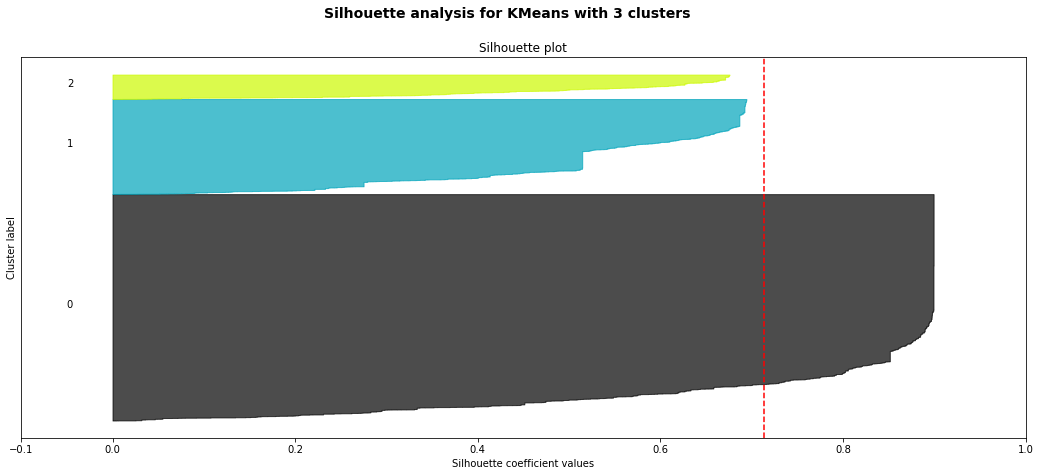

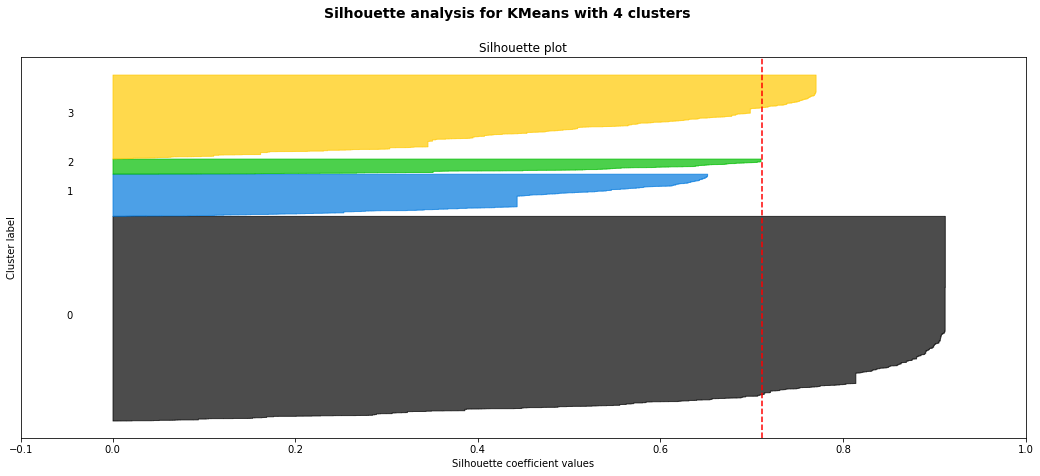

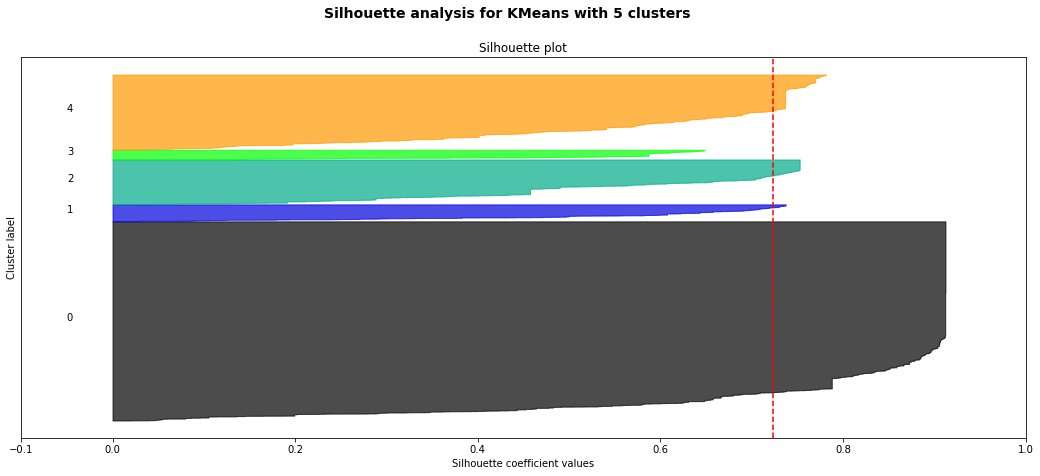

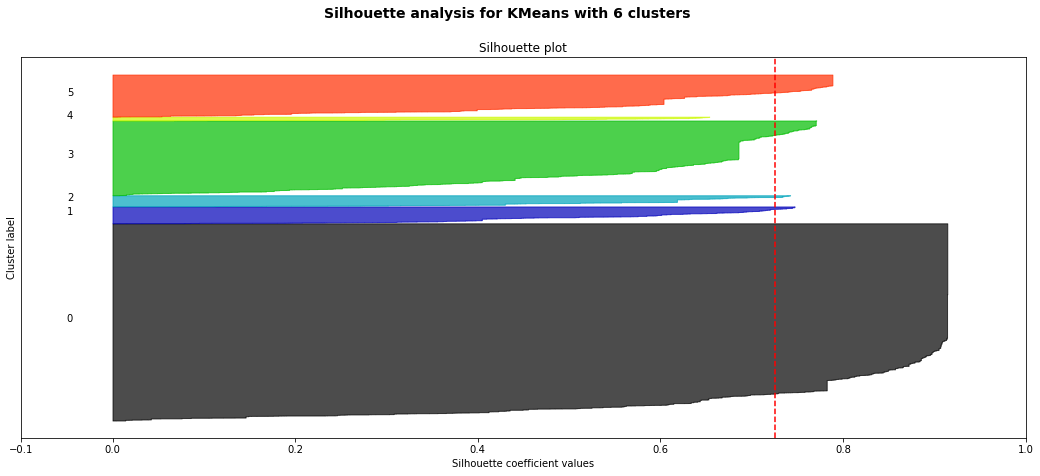

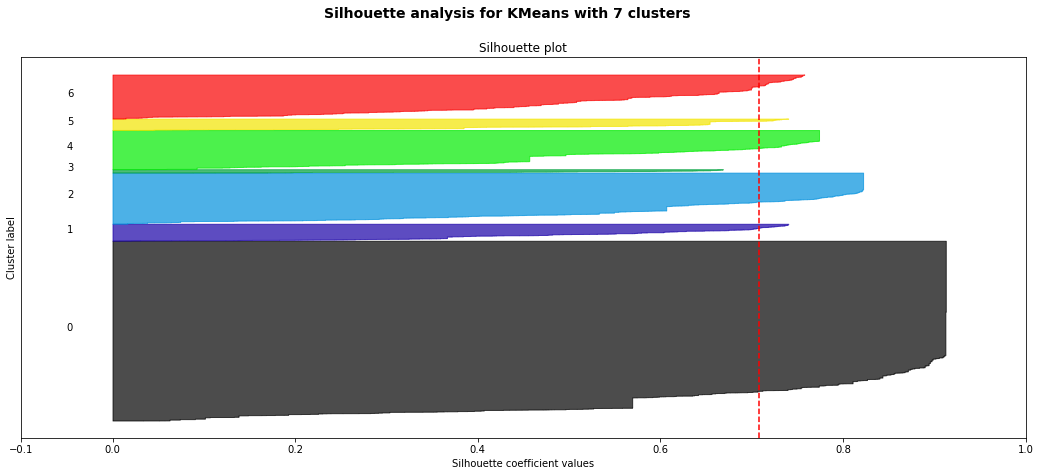

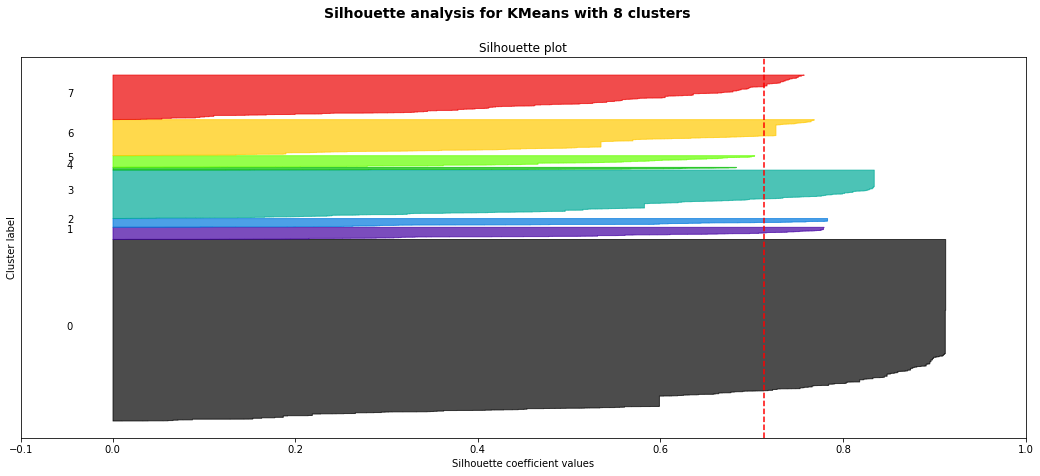

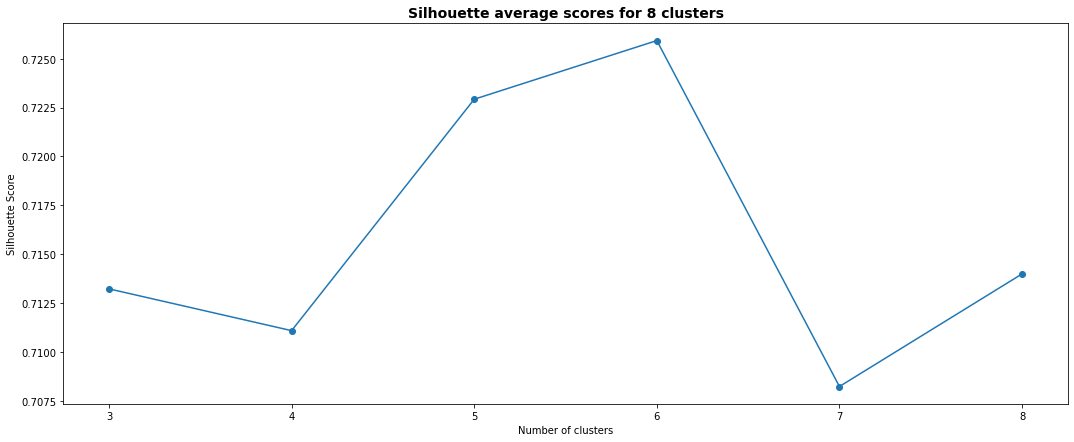

In [151]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,9) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(one_hot_encoded_data_1)

    labels_pred = kmeans.predict(one_hot_encoded_data_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(one_hot_encoded_data_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(one_hot_encoded_data_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

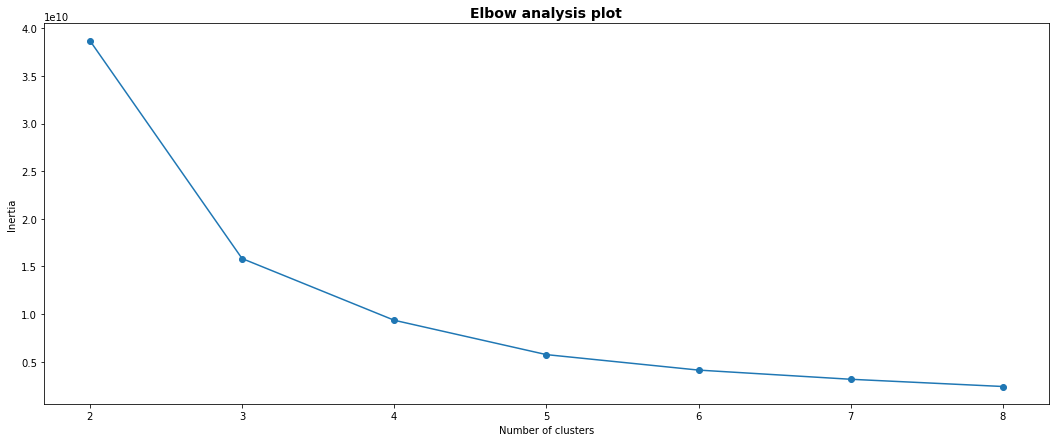

In [148]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

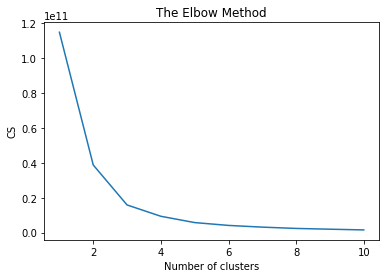

In [150]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    kmeans.fit(one_hot_encoded_data_1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [152]:
cols = one_hot_encoded_data_1.columns

In [153]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

one_hot_encoded_data_1 = ms.fit_transform(one_hot_encoded_data_1)

In [154]:
one_hot_encoded_data_1 = pd.DataFrame(one_hot_encoded_data_1, columns=[cols])

In [155]:
one_hot_encoded_data_1.head()

,coordinates,statuscode_400,statuscode_403,statuscode_404,statuscode_412,statuscode_503,contenttype_text/html,contenttype_text/html; charset=utf-8,uafamily_1.0,uafamily_3.0,uafamily_12.0,uafamily_23.0,livechannel_57.0,livechannel_58.0,livechannel_59.0,livechannel_60.0,livechannel_68.0,livechannel_82.0,livechannel_86.0
0,0.104197,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.033296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.211420,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


For 3 clusters the average silhouette_score is : 0.9497648892718519
For 4 clusters the average silhouette_score is : 0.9566933579759928
For 5 clusters the average silhouette_score is : 0.9579986376548655
For 6 clusters the average silhouette_score is : 0.8337685053137481
For 7 clusters the average silhouette_score is : 0.8356205166947461


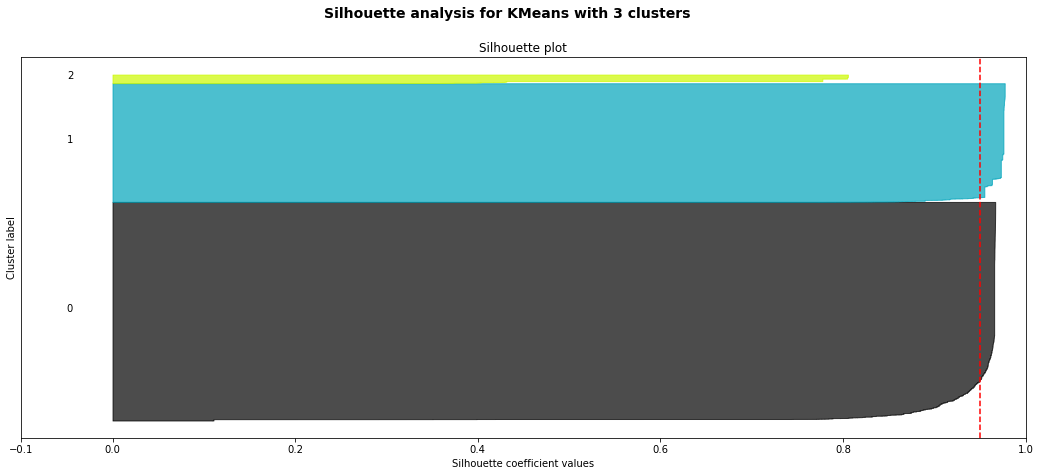

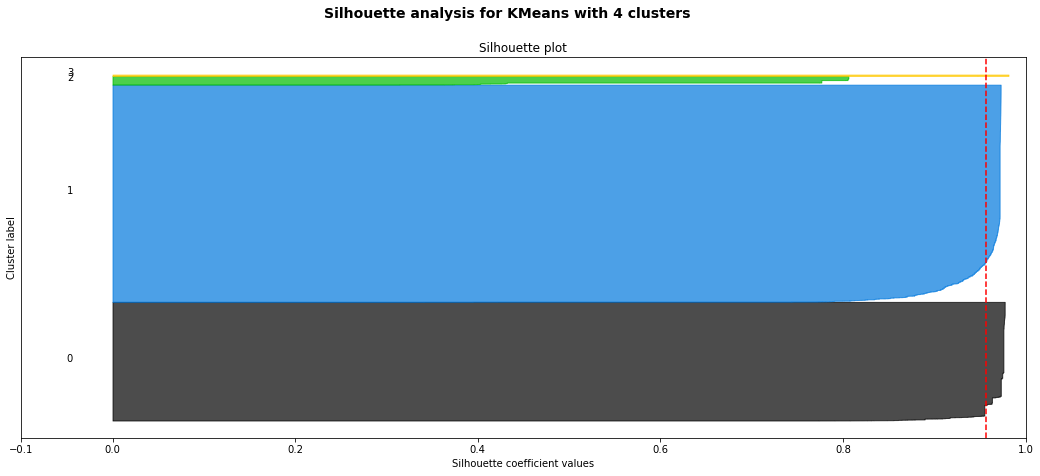

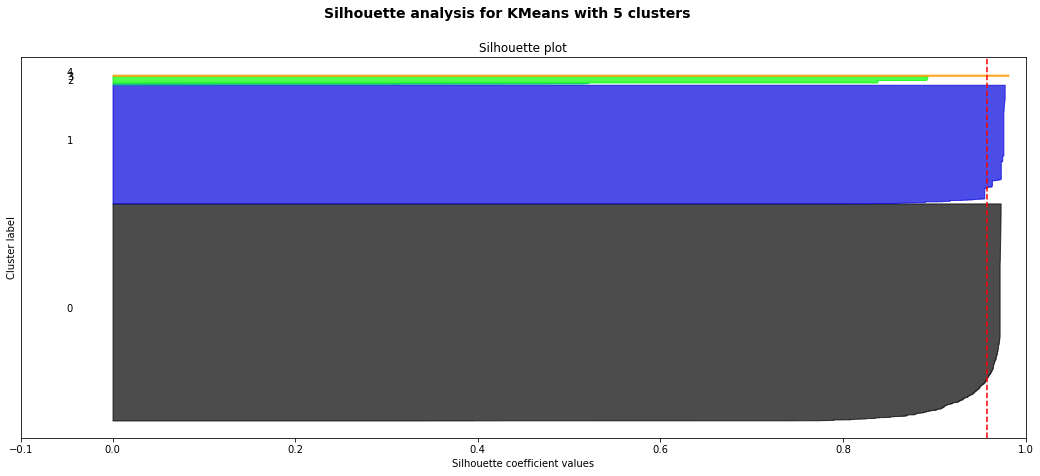

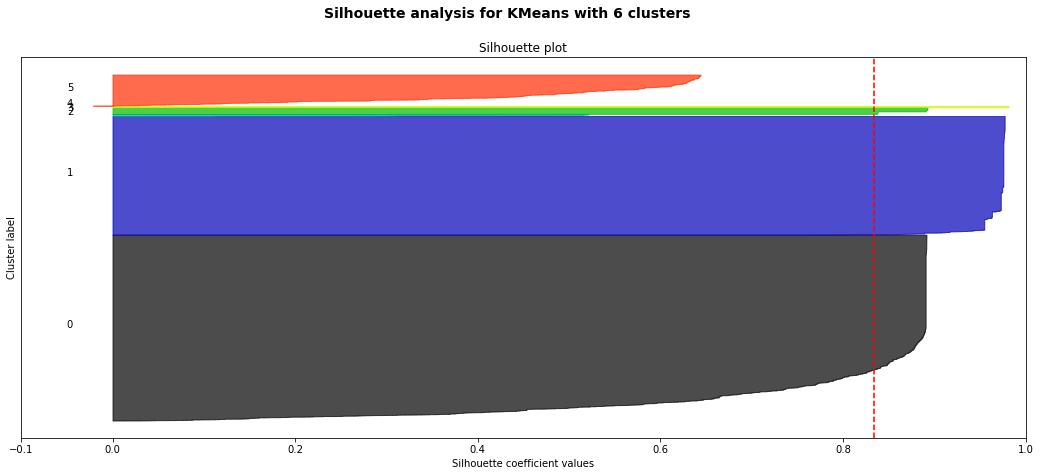

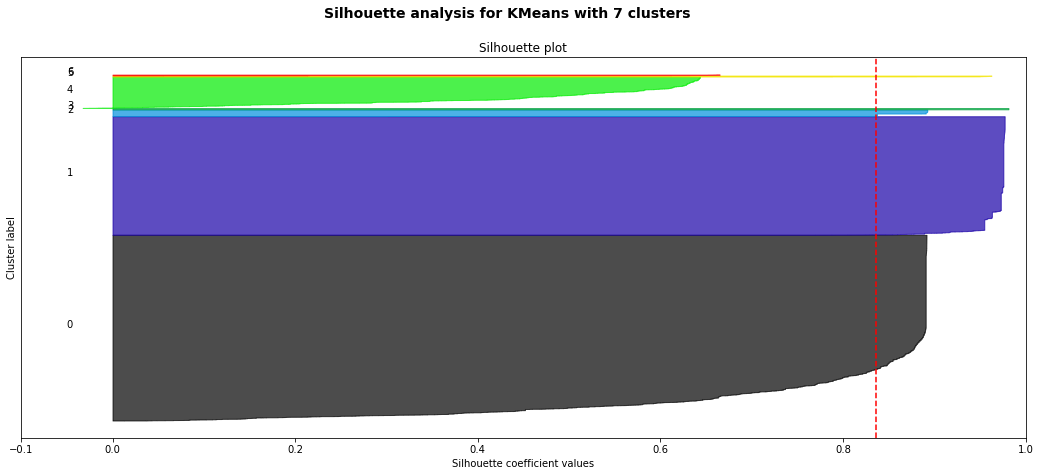

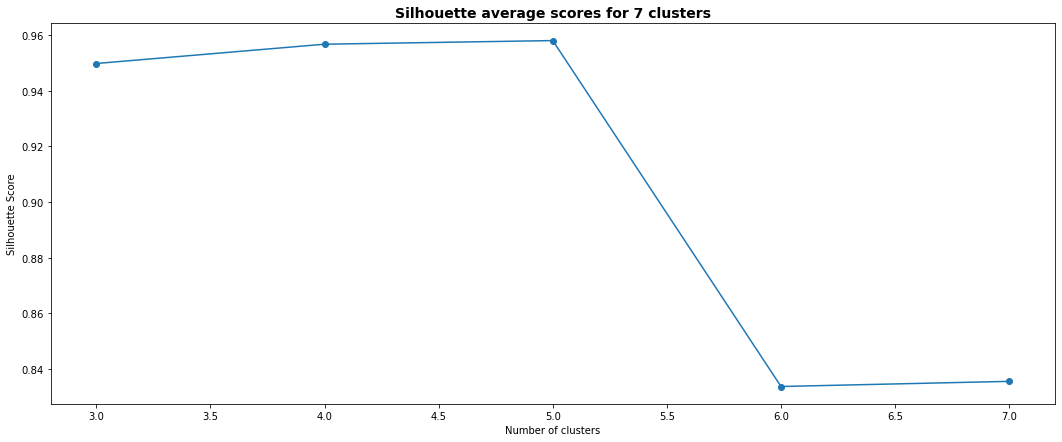

In [156]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(one_hot_encoded_data_1)

    labels_pred = kmeans.predict(one_hot_encoded_data_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(one_hot_encoded_data_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(one_hot_encoded_data_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

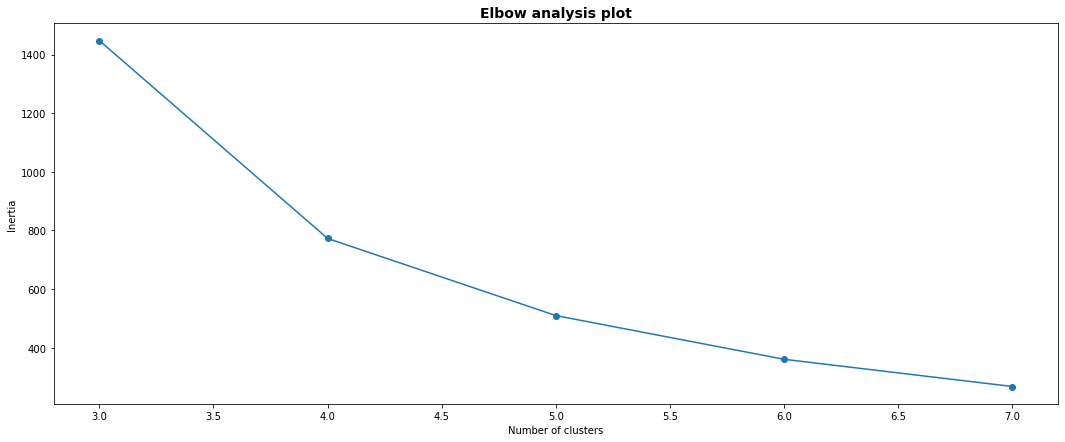

In [157]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [264]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=1).fit(one_hot_encoded_data_1)
labels = kmeans.labels_
davies_bouldin_score(one_hot_encoded_data_1, labels)

0.31128496114445237

In [263]:
metrics.calinski_harabasz_score(one_hot_encoded_data_1, labels)

1280814.4283787843

In [170]:
df_7host.head()

,statuscode,contenttype,uafamily,coordinates,livechannel
70,0,text/html; charset=utf-8,12.0,2031.0,60.0
73,0,text/html; charset=utf-8,12.0,58.0,60.0
74,0,text/html; charset=utf-8,12.0,649.0,60.0
75,0,text/html; charset=utf-8,12.0,0.0,60.0
79,3,text/html,12.0,4121.0,60.0


In [169]:
df_7host['statuscode']= le.fit_transform(df_7host['statuscode'])

In [247]:
cols = one_hot_encoded_data_123.columns

In [248]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

one_hot_encoded_data_123 = ms.fit_transform(one_hot_encoded_data_123)

In [249]:
one_hot_encoded_data_123 = pd.DataFrame(one_hot_encoded_data_123, columns=[cols])

In [250]:
one_hot_encoded_data_123.head()

,statuscode,coordinates,contenttype_text/html,contenttype_text/html; charset=utf-8,uafamily_1.0,uafamily_3.0,uafamily_12.0,uafamily_23.0,livechannel_57.0,livechannel_58.0,livechannel_59.0,livechannel_60.0,livechannel_68.0,livechannel_82.0,livechannel_86.0,pred
0,0.00,0.525936,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.00
1,0.00,0.022324,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00
2,0.00,0.206829,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.75
3,0.00,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00
4,0.75,0.780039,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.50


In [173]:
x = df_7host.iloc[:,1:]
y = df_7host['statuscode']

In [174]:
x.head()

,contenttype,uafamily,coordinates,livechannel
70,text/html; charset=utf-8,12.0,2031.0,60.0
73,text/html; charset=utf-8,12.0,58.0,60.0
74,text/html; charset=utf-8,12.0,649.0,60.0
75,text/html; charset=utf-8,12.0,0.0,60.0
79,text/html,12.0,4121.0,60.0


In [193]:
df_7host['coordinates']= le.fit_transform(df_7host['coordinates'])
df_7host['statuscode']= le.fit_transform(df_7host['statuscode'])

In [298]:
one_hot_encoded_data_133 = pd.get_dummies(df_7host, columns = ['contenttype'])
print(one_hot_encoded_data_133)

        statuscode  uafamily  coordinates  livechannel  contenttype_text/html  \
70               0      12.0          801         60.0                      0   
73               0      12.0           34         60.0                      0   
74               0      12.0          315         60.0                      0   
75               0      12.0            0         60.0                      0   
79               3      12.0         1188         60.0                      1   
...            ...       ...          ...          ...                    ...   
286966           0      12.0          129         60.0                      0   
286967           3      12.0         1407         60.0                      1   
286968           0      12.0          491         60.0                      0   
286973           0      12.0          176         60.0                      0   
286974           3      12.0          255         60.0                      1   

        contenttype_text/ht

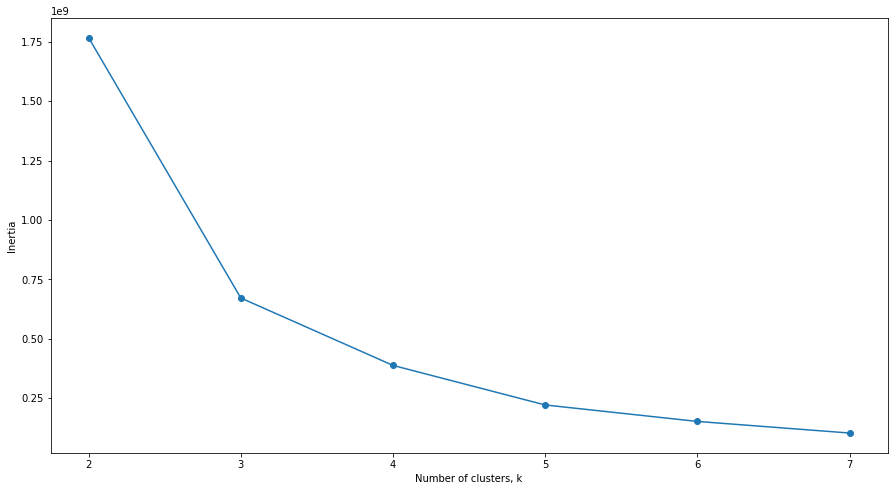

In [177]:
#First : Get the Best KMeans 
ks = range(2,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k)
    kc.fit(one_hot_encoded_data_111)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.show()

For 3 clusters the average silhouette_score is : 0.6421234007055949
For 4 clusters the average silhouette_score is : 0.673888933835564
For 5 clusters the average silhouette_score is : 0.6809598914983771
For 6 clusters the average silhouette_score is : 0.7139560466489153
For 7 clusters the average silhouette_score is : 0.7458061541839148


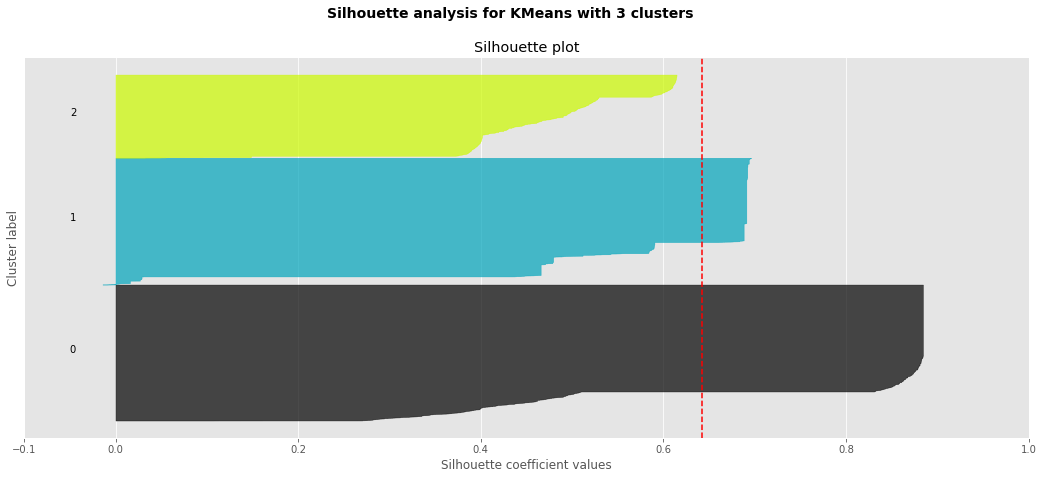

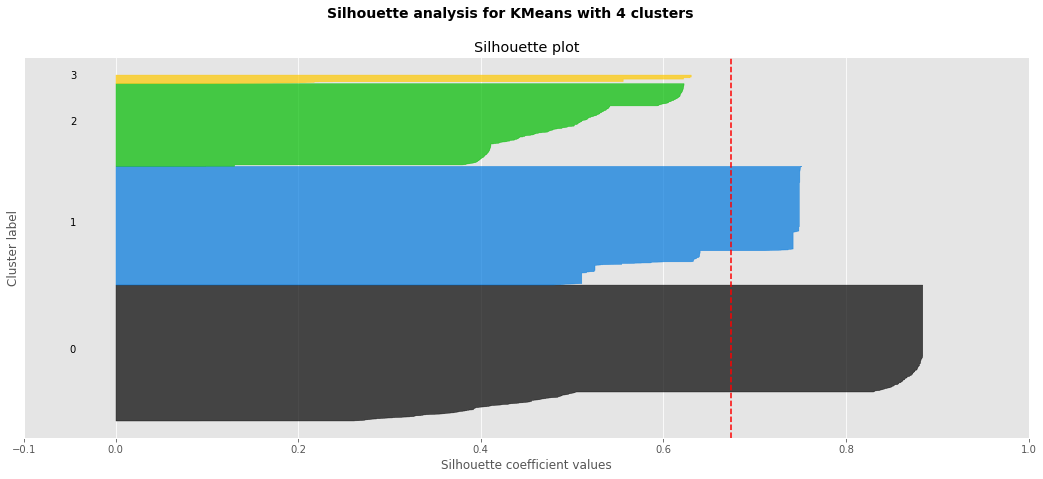

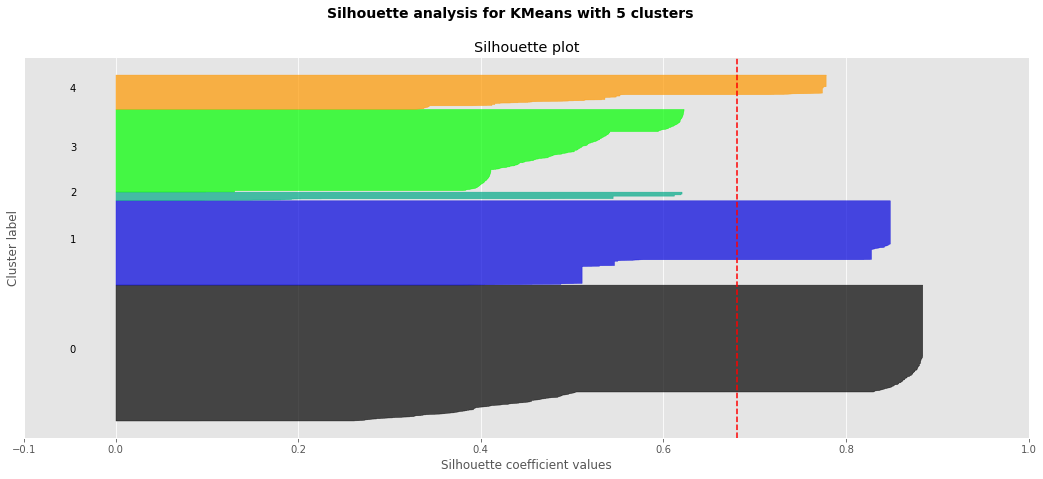

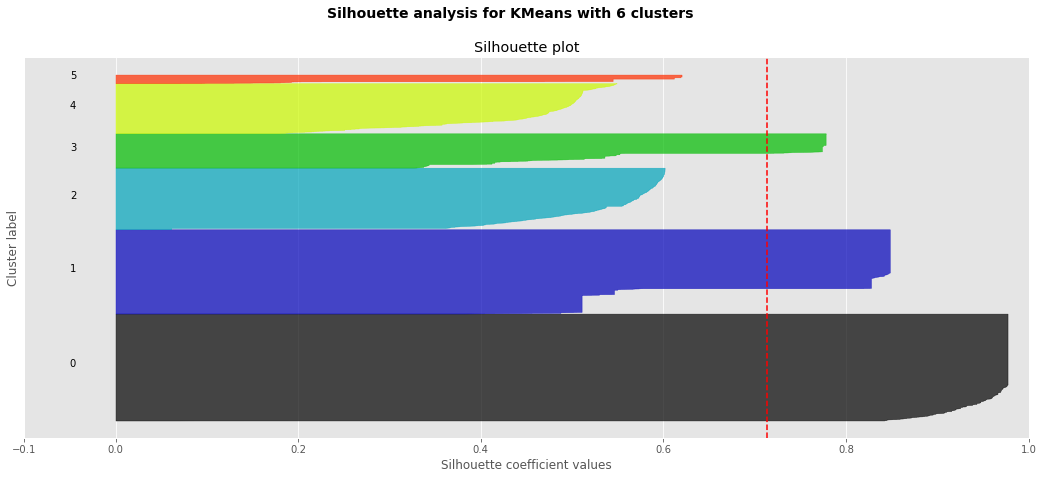

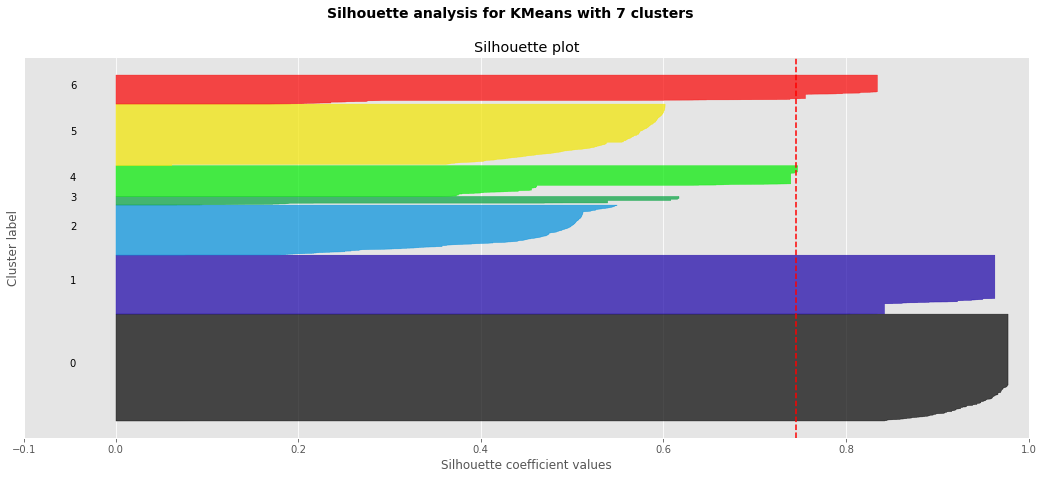

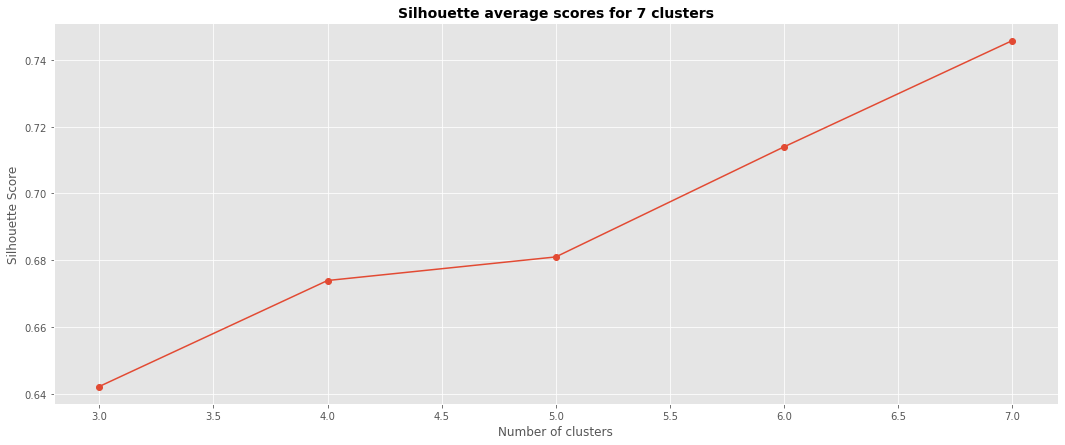

In [251]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(one_hot_encoded_data_123)

    labels_pred = kmeans.predict(one_hot_encoded_data_123)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(one_hot_encoded_data_123, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(one_hot_encoded_data_123, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

In [252]:
cluster_model = KMeans(n_clusters=5, random_state=100)

In [253]:
cluster_model.fit(one_hot_encoded_data_123)

KMeans(n_clusters=5, random_state=100)

In [254]:
cluster_model.labels_

array([2, 0, 2, ..., 0, 2, 3])

In [255]:
cluster_labels = cluster_model.fit_predict(one_hot_encoded_data_123)

In [256]:
kmeans=one_hot_encoded_data_123

In [257]:
kmeans['pred'] = cluster_labels

In [259]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(cluster_labels, cluster_model.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17168
           1       1.00      1.00      1.00     10648
           2       1.00      1.00      1.00      1083
           3       1.00      1.00      1.00     10436
           4       1.00      1.00      1.00      4335

    accuracy                           1.00     43670
   macro avg       1.00      1.00      1.00     43670
weighted avg       1.00      1.00      1.00     43670



In [245]:
from sklearn import metrics
metrics.rand_score(one_hot_encoded_data_123.statuscode, cluster_model.labels_)

0.9997782347116614

In [158]:
df_filecaching = df[df['host'] == 13]

In [159]:
df_filecaching.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
2,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
5,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
9,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
72,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
201,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0


In [160]:
df_filecaching.cachecontrol.value_counts().sort_values()

Cache-Control:                   41
Cache-Control:max-age=3600    11617
Name: cachecontrol, dtype: int64

In [161]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      11658 non-null  int64  
 1   contenttype     11658 non-null  object 
 2   protocol        11658 non-null  object 
 3   osfamily        11658 non-null  float64
 4   cachecontrol    11658 non-null  object 
 5   uamajor         11644 non-null  float64
 6   uafamily        11658 non-null  float64
 7   devicefamily    11658 non-null  float64
 8   contentpackage  0 non-null      float64
 9   coordinates     11658 non-null  float64
 10  livechannel     0 non-null      float64
 11  devicemodel     3108 non-null   float64
 12  devicebrand     3108 non-null   float64
 13  host            11658 non-null  float64
 14  method          11658 non-null  object 
 15  assetnumber     0 non-null      float64
 16  cachename       11658 non-null  int64  
dtypes: float64(11), int64(2), obje

In [162]:
df_filecaching=df_filecaching.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [163]:
df_filecaching.nunique()

statuscode       4
contenttype      3
protocol         1
osfamily         1
cachecontrol     2
uamajor          2
uafamily         4
devicefamily     2
coordinates     21
devicemodel      1
devicebrand      1
host             1
method           2
cachename        3
dtype: int64

In [164]:
df_filecaching=df_filecaching.drop(labels=["protocol","osfamily","cachecontrol", "devicemodel", "devicebrand", "host"],axis=1)

In [165]:
df_filecaching.nunique()

statuscode       4
contenttype      3
uamajor          2
uafamily         4
devicefamily     2
coordinates     21
method           2
cachename        3
dtype: int64

In [166]:
df_filecaching.isnull().sum()

statuscode       0
contenttype      0
uamajor         14
uafamily         0
devicefamily     0
coordinates      0
method           0
cachename        0
dtype: int64

In [167]:
df_filecaching.uamajor.value_counts().sort_values()

19.0    3107
14.0    8537
Name: uamajor, dtype: int64

In [267]:
df_filecaching.fillna("-1.0", inplace = True)

In [268]:
df_filecaching.isnull().sum()

statuscode      0
contenttype     0
uamajor         0
uafamily        0
devicefamily    0
coordinates     0
method          0
cachename       0
dtype: int64

In [269]:
df_filecaching_1 = df_filecaching.copy()

In [270]:
categorical_cols = df_filecaching_1.select_dtypes(include= "object").columns
categorical_cols

Index(['contenttype', 'uamajor', 'method'], dtype='object')

In [271]:
df_filecaching_1[categorical_cols] = df_filecaching_1[categorical_cols].apply(lambda x:x.astype("category"))

In [272]:
df_filecaching_1[categorical_cols]=df_filecaching_1[categorical_cols].apply(lambda x: x.cat.codes)

In [273]:
df_filecaching_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    11658 non-null  int64  
 1   contenttype   11658 non-null  int8   
 2   uamajor       11658 non-null  int8   
 3   uafamily      11658 non-null  float64
 4   devicefamily  11658 non-null  float64
 5   coordinates   11658 non-null  float64
 6   method        11658 non-null  int8   
 7   cachename     11658 non-null  int64  
dtypes: float64(3), int64(2), int8(3)
memory usage: 580.6 KB


In [276]:
X = df_filecaching_1.loc[:, df_filecaching_1.columns != "statuscode"]
y = df_filecaching_1["statuscode"]

In [277]:
# Lets use the sklearn chi2 fnction
cs = SelectKBest(score_func=chi2,k=5)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=5,columns="Score")

,Score,P_Value
coordinates,2.133969e+06,0.000000e+00
method,1.163100e+04,0.000000e+00
devicefamily,9.150678e+03,0.000000e+00
uafamily,5.943461e+02,1.694625e-128
uamajor,2.102933e+02,2.516498e-45


In [278]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [279]:
from sklearn.ensemble import ExtraTreesClassifier

In [280]:
etc.fit(x_train, y_train)

ExtraTreesClassifier(criterion='entropy')

In [281]:
pred_etc = etc.predict(x_test)

In [282]:
from sklearn.metrics import confusion_matrix
tab_etc = confusion_matrix(pred_etc, y_test)

In [283]:
tab_etc

array([[   0,    1,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0, 2328,    0],
       [   0,    0,    0,    3]], dtype=int64)

In [284]:
etc.feature_importances_

array([0.27646401, 0.15459339, 0.07730302, 0.03832003, 0.05712609,
       0.38710787, 0.00908559])

In [285]:
feature_importance = pd.DataFrame({"Features" : x_train.columns, "Score" :etc.feature_importances_})
feature_importance.head(5)

,Features,Score
0,contenttype,0.276464
1,uamajor,0.154593
2,uafamily,0.077303
3,devicefamily,0.038320
4,coordinates,0.057126


In [286]:
feature_importance =  feature_importance.sort_values('Score', ascending=False)
feature_importance.head(5)

,Features,Score
5,method,0.387108
0,contenttype,0.276464
1,uamajor,0.154593
2,uafamily,0.077303
4,coordinates,0.057126


In [287]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

KNeighborsClassifier()

In [288]:
sfs1 = SFS(model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=0)


sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   15.4s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   15.6s finished

[2022-03-06 17:07:27] Features: 1/5 -- score: 0.9986060476088355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.0s finished

[2022-03-06 17:07:34] Features: 2/5 -- score: 0.9993566373579241[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished

[2022-03-06 17:07:38] Features: 3/5 -- score: 0.9994638644649367[Parallel(n_jobs=-1)]: Using backend Lok

In [289]:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.99860605]),
  'avg_score': 0.9986060476088355,
  'feature_names': ('contenttype',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.99935664]),
  'avg_score': 0.9993566373579241,
  'feature_names': ('contenttype', 'uamajor')},
 3: {'feature_idx': (0, 1, 6),
  'cv_scores': array([0.99946386]),
  'avg_score': 0.9994638644649367,
  'feature_names': ('contenttype', 'uamajor', 'cachename')},
 4: {'feature_idx': (0, 1, 5, 6),
  'cv_scores': array([0.99946386]),
  'avg_score': 0.9994638644649367,
  'feature_names': ('contenttype', 'uamajor', 'method', 'cachename')},
 5: {'feature_idx': (0, 1, 2, 5, 6),
  'cv_scores': array([0.99935664]),
  'avg_score': 0.9993566373579241,
  'feature_names': ('contenttype',
   'uamajor',
   'uafamily',
   'method',
   'cachename')}}

In [290]:
sfs1.get_metric_dict()

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (0,),
  'cv_scores': array([0.99860605]),
  'avg_score': 0.9986060476088355,
  'feature_names': ('contenttype',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.99935664]),
  'avg_score': 0.9993566373579241,
  'feature_names': ('contenttype', 'uamajor'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 1, 6),
  'cv_scores': array([0.99946386]),
  'avg_score': 0.9994638644649367,
  'feature_names': ('contenttype', 'uamajor', 'cachename'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 1, 5, 6),
  'cv_scores': array([0.99946386]),
  'avg_score': 0.9994638644649367,
  'feature_names': ('contenttype', 'uamajor', 'method', 'cachename'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 2, 5, 6),
  'cv_scores': array([0.99935664]),
  'avg_score': 0.9993566373579241,
  'feature_names': ('contenttype',
   'uamajor',
  

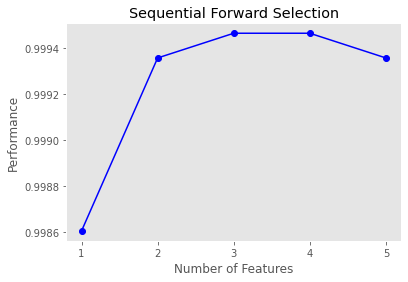

In [291]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [292]:
sfs1.k_feature_idx_

(0, 1, 2, 5, 6)

In [293]:
df_filecaching_1.columns[1:][list(sfs1.k_feature_idx_)]

Index(['contenttype', 'uamajor', 'uafamily', 'method', 'cachename'], dtype='object')

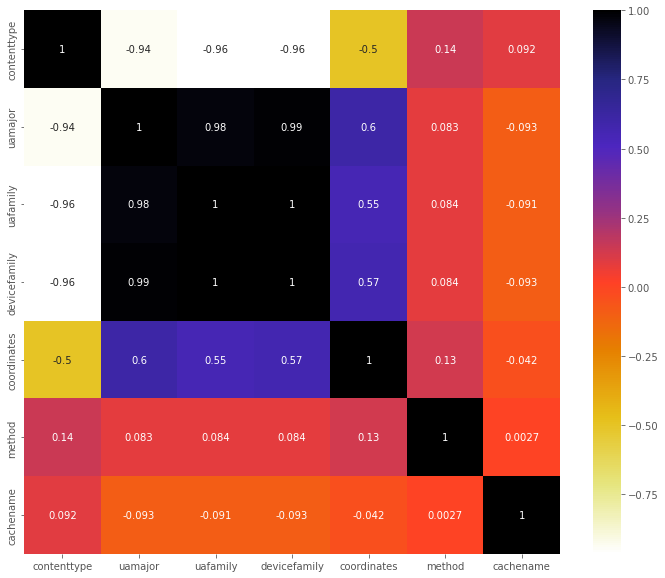

In [294]:
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [295]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [296]:
corr_features = correlation(x_train, 0.85)
len(set(corr_features))

3

In [297]:
corr_features

{'devicefamily', 'uafamily', 'uamajor'}

In [10]:
df_website = df[df['host'] == 3]

In [11]:
df_website.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
76,403,text/html,HTTP/1.1,1.0,Cache-Control:max-age=60,2.0,20.0,73.0,NaN,1.0,NaN,74.0,7.0,3.0,GET,NaN,0
623,403,text/html,HTTP/1.1,3.0,Cache-Control:max-age=60,15.0,11.0,2.0,NaN,0.0,NaN,1.0,1.0,3.0,GET,NaN,0
730,403,text/html,HTTP/1.1,2.0,Cache-Control:max-age=60,7.0,7.0,0.0,NaN,3910.0,NaN,NaN,NaN,3.0,GET,NaN,0
743,403,text/html,HTTP/1.1,1.0,Cache-Control:max-age=60,NaN,1.0,73.0,NaN,1.0,NaN,74.0,7.0,3.0,GET,NaN,0
757,403,text/html,HTTP/1.1,5.0,Cache-Control:max-age=60,14.0,30.0,161.0,NaN,193.0,NaN,163.0,15.0,3.0,GET,NaN,0


In [12]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      1660 non-null   int64  
 1   contenttype     1660 non-null   object 
 2   protocol        1660 non-null   object 
 3   osfamily        1660 non-null   float64
 4   cachecontrol    1660 non-null   object 
 5   uamajor         1377 non-null   float64
 6   uafamily        1660 non-null   float64
 7   devicefamily    1660 non-null   float64
 8   contentpackage  0 non-null      float64
 9   coordinates     1631 non-null   float64
 10  livechannel     0 non-null      float64
 11  devicemodel     1477 non-null   float64
 12  devicebrand     1477 non-null   float64
 13  host            1660 non-null   float64
 14  method          1660 non-null   object 
 15  assetnumber     0 non-null      float64
 16  cachename       1660 non-null   int64  
dtypes: float64(11), int64(2), obje

In [13]:
df_website=df_website.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [38]:
df_website=df_website.drop(labels=["cachecontrol"],axis=1)

In [39]:
df_website.nunique()

statuscode        2
contenttype       2
osfamily          9
uamajor          45
uafamily         24
devicefamily     93
coordinates     244
devicemodel      93
devicebrand      14
method            3
cachename         3
dtype: int64

In [15]:
df_website=df_website.drop(labels=["protocol","host"],axis=1)

In [40]:
df_website.isnull().sum()

statuscode      0
contenttype     0
osfamily        0
uamajor         0
uafamily        0
devicefamily    0
coordinates     0
devicemodel     0
devicebrand     0
method          0
cachename       0
dtype: int64

In [17]:
df_website.fillna("-1.0", inplace = True)

In [41]:
df_website_1 = df_website.copy()

In [42]:
categorical_cols = df_website.select_dtypes(include= "object").columns
categorical_cols

Index(['contenttype', 'uamajor', 'coordinates', 'devicemodel', 'devicebrand',
       'method'],
      dtype='object')

In [43]:
df_website_1[categorical_cols] = df_website_1[categorical_cols].apply(lambda x:x.astype("category"))

In [44]:
df_website_1[categorical_cols]=df_website_1[categorical_cols].apply(lambda x: x.cat.codes)

In [45]:
df_website_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    1660 non-null   int64  
 1   contenttype   1660 non-null   int8   
 2   osfamily      1660 non-null   float64
 3   uamajor       1660 non-null   int8   
 4   uafamily      1660 non-null   float64
 5   devicefamily  1660 non-null   float64
 6   coordinates   1660 non-null   int16  
 7   devicemodel   1660 non-null   int8   
 8   devicebrand   1660 non-null   int8   
 9   method        1660 non-null   int8   
 10  cachename     1660 non-null   int64  
dtypes: float64(3), int16(1), int64(2), int8(5)
memory usage: 89.2 KB


In [46]:
X = df_website_1.loc[:, df_website_1.columns != "statuscode"]
y = df_website_1["statuscode"]

In [47]:
cs = SelectKBest(score_func=chi2,k=5)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=5,columns="Score")

,Score,P_Value
devicefamily,4590.761789,0.000000e+00
coordinates,2268.834729,0.000000e+00
method,1625.213115,0.000000e+00
contenttype,1599.000000,0.000000e+00
uafamily,945.870985,1.047831e-207


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
etc.fit(x_train, y_train)

ExtraTreesClassifier(criterion='entropy')

In [30]:
etc = ExtraTreesClassifier(criterion='entropy')

In [51]:
pred_etc = etc.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix
tab_etc = confusion_matrix(pred_etc, y_test)

In [53]:
tab_etc

array([[323,   0],
       [  0,   9]], dtype=int64)

In [54]:
etc.feature_importances_

array([0.56538856, 0.00438094, 0.02707054, 0.03024339, 0.00408335,
       0.00878148, 0.00623082, 0.0032207 , 0.34956964, 0.00103059])

In [55]:
feature_importance = pd.DataFrame({"Features" : x_train.columns, "Score" :etc.feature_importances_})
feature_importance.head(5)

,Features,Score
0,contenttype,0.565389
1,osfamily,0.004381
2,uamajor,0.027071
3,uafamily,0.030243
4,devicefamily,0.004083


In [56]:
feature_importance =  feature_importance.sort_values('Score', ascending=False)
feature_importance.head(5)

,Features,Score
0,contenttype,0.565389
8,method,0.349570
3,uafamily,0.030243
2,uamajor,0.027071
5,coordinates,0.008781


In [57]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [60]:
sfs1 = SFS(model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=0)


sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished

[2022-03-07 16:04:40] Features: 1/5 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-03-07 16:04:40] Features: 2/5 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-03-07 16:04:40] Features: 3/5 -- score: 1.0[Par

In [61]:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype', 'osfamily')},
 3: {'feature_idx': (0, 1, 8),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype', 'osfamily', 'method')},
 4: {'feature_idx': (0, 1, 8, 9),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype', 'osfamily', 'method', 'cachename')},
 5: {'feature_idx': (0, 1, 3, 8, 9),
  'cv_scores': array([0.99698795]),
  'avg_score': 0.9969879518072289,
  'feature_names': ('contenttype',
   'osfamily',
   'uafamily',
   'method',
   'cachename')}}

In [62]:
sfs1.get_metric_dict()

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (0,),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype', 'osfamily'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 1, 8),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype', 'osfamily', 'method'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 1, 8, 9),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('contenttype', 'osfamily', 'method', 'cachename'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 3, 8, 9),
  'cv_scores': array([0.99698795]),
  'avg_score': 0.9969879518072289,
  'feature_names': ('contenttype',
   'osfamily',
   'uafamily',
   'method',
   'cachename'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err'

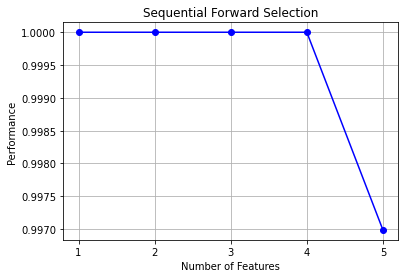

In [63]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [64]:
sfs1.k_feature_idx_

(0, 1, 3, 8, 9)

In [65]:
df_website_1.columns[1:][list(sfs1.k_feature_idx_)]

Index(['contenttype', 'osfamily', 'uafamily', 'method', 'cachename'], dtype='object')

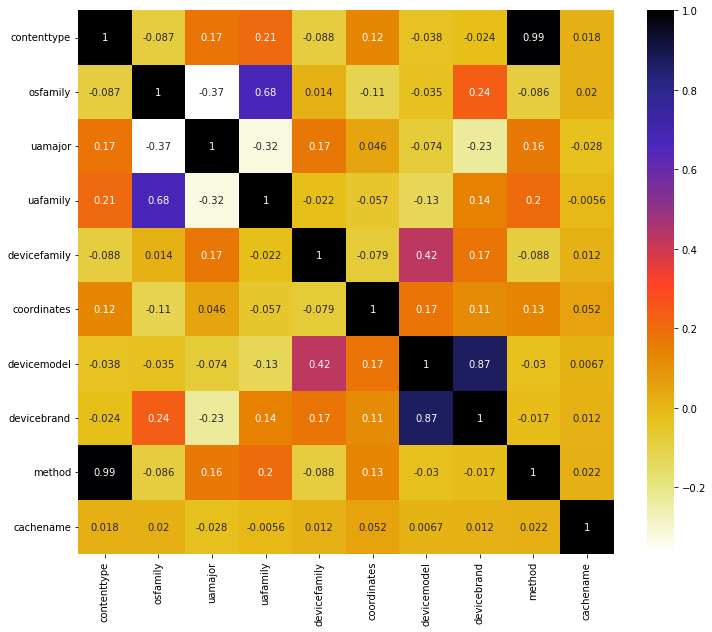

In [66]:
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [67]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(x_train, 0.85)
len(set(corr_features))

2

In [69]:
corr_features

{'devicebrand', 'method'}